In [1]:
import pandas as pd
import numpy as np
from random import randint

# Q 1

##### creating files 

In [71]:
# # file1
# names = []
# for i in range(0,20):
#     firstletter = randint(65,90)
#     lastletter = randint(97,122)
#     names.append(chr(firstletter)+chr(lastletter))

# hour = [4]*20
# min = np.random.randint(0,30,20)
# sec = np.random.randint(0,60,20)

# Time = []
# for h,m,s in zip(hour,min,sec):
#     Time.append('{}:{}:{}'.format(h,m,s))

# duration = [50,30,40,30,50,30,30,50,40,30,30,40,30,40,30,30,30,40,50,50]

# file_1 = pd.DataFrame({
#     'Name' : names,
#     'Time Of Joining' : Time,
#     'Duration' : duration
# })

In [72]:
# file_1.to_excel('C:\\Users\\keshav\\Semester5\\DAV\\Q4_Files\\AttendanceDay_1.xlsx')

In [73]:
# # file2
# name_2 = []
# for i in range(0,5):
#     firstletter = randint(65,90)
#     lastletter = randint(97,122)
#     name_2.append(chr(firstletter)+chr(lastletter))

# name_2.extend(names[:15])

# hour = [4]*20
# min = np.random.randint(0,30,20)
# sec = np.random.randint(0,60,20)

# Time = []
# for h,m,s in zip(hour,min,sec):
#     Time.append('{}:{}:{}'.format(h,m,s))

# duration = [50,30,40,30,50,30,30,50,40,30,30,40,30,40,30,30,30,40,50,50]

# file_2 = pd.DataFrame({
#     'Name' : name_2,
#     'Time Of Joining' : Time,
#     'Duration' : duration
# })

In [74]:
# file_2.to_excel('Q4_Files\\AttendanceDay_2.xlsx')

In [13]:
df1 = pd.read_excel('Q4_Files\\AttendanceDay_1.xlsx')
df1.drop('Unnamed: 0',axis=1,inplace = True)
df2 = pd.read_excel('Q4_Files\\AttendanceDay_2.xlsx')
df2.drop('Unnamed: 0',axis=1,inplace = True)
display(df1.head(5))
display(df2.head(5))

,Name,Time Of Joining,Duration
0,Hq,4:15:1,50
1,Em,4:25:37,30
2,Ci,4:6:39,40
3,Qg,4:19:16,30
4,Mh,4:1:49,50


,Name,Time Of Joining,Duration
0,Ha,4:14:36,50
1,Eo,4:6:28,30
2,Bl,4:1:9,40
3,Gj,4:28:12,30
4,Ru,4:14:11,50


In [18]:
'''
(A)
'''
merged_df = df1.merge(df2,on = 'Name',suffixes = ['_Day_1','_Day_2'])
print('**********OUTPUT*********')
print('\nName of students who had attended the workshop on both days :: ')
merged_df['Name']

**********OUTPUT*********

Name of students who had attended the workshop on both days :: 


0     Hq
1     Em
2     Ci
3     Qg
4     Mh
5     Xs
6     Wh
7     Dm
8     Ym
9     Ap
10    Qx
11    Jp
12    Yb
13    Zm
14    Ao
Name: Name, dtype: object

In [54]:
'''
(B)
'''

merged_df_2 = df1.merge(df2,on='Name',how='outer',suffixes = ['_Day_1','_Day_2'])
print('**********OUTPUT*********')
print('\nName of students who had attended the workshop on either of the days :: ')
merged_df_2['Name']

**********OUTPUT*********

Name of students who had attended the workshop on either of the days :: 


0     Hq
1     Em
2     Ci
3     Qg
4     Mh
5     Xs
6     Wh
7     Dm
8     Ym
9     Ap
10    Qx
11    Jp
12    Yb
13    Zm
14    Ao
15    Ze
16    Oy
17    Ol
18    Sw
19    Nf
20    Ha
21    Eo
22    Bl
23    Gj
24    Ru
Name: Name, dtype: object

In [25]:
''' 
(C)
''' 
merged_df_3 = pd.concat([df1,df2],ignore_index=True)
print('*********OUTPUT********\n')
print('Total number of records in the dataframe :: ',len(merged_df_3))


*********OUTPUT********

Total number of records in the dataframe ::  40


In [34]:
''' 
(D)
''' 

new_df = merged_df_3.set_index(['Name','Duration']).sort_index(level=0)
print('**********OUTPUT*********')
print('\nDataFrame with multi-index :: ')
display(new_df.head(5))
print('\nDescriptive statistics :: ')
new_df.describe()

**********OUTPUT*********

DataFrame with multi-index :: 


Time Of Joining
Name Duration                
Ao   30               4:18:50
     50                4:3:32
Ap   30               4:19:25
     30               4:13:24
Bl   40                 4:1:9


Descriptive statistics :: 


,Time Of Joining
count,40
unique,40
top,4:18:50
freq,1


In [61]:
''' 
(E)
''' 
# set some values to nan
merged_df_2.iloc[0,[1,2,4]] = np.nan
merged_df_2.iloc[10,:] = np.nan
merged_df_2.iloc[1,4] = np.nan
merged_df_2.iloc[8,0] = np.nan
print('**********OUTPUT*********')
display(merged_df_2.head(5))

tempSeries = merged_df_2.isnull().sum(axis=1)  #count nan values in a row
print('\nNumber of rows with more than one NA values :: ',tempSeries[tempSeries > 1].count())   #count rows having more than one nan values


**********OUTPUT*********


,Name,Time Of Joining_Day_1,Duration_Day_1,Time Of Joining_Day_2,Duration_Day_2
0,Hq,NaN,NaN,4:7:24,NaN
1,Em,4:25:37,30.0,4:28:49,NaN
2,Ci,4:6:39,40.0,4:20:48,50.0
3,Qg,4:19:16,30.0,4:6:0,40.0
4,Mh,4:1:49,50.0,4:8:54,30.0



Number of rows with more than one NA values ::  12


# Q 2

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt 

df = datasets.load_iris()
target_col = pd.DataFrame(df.target)
target_class = df.target_names
df = pd.DataFrame(df.data,columns=df.feature_names)
df = df.join(target_col)
df = df.rename({0:'Target'},axis=1)

fnc = lambda x : target_class[x]

df['Class Label'] = df['Target'].map(fnc)

display(df)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Class Label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


setosa        50
versicolor    50
virginica     50
Name: Class Label, dtype: int64

Text(0.5, 1.0, 'Frequency of each class label')

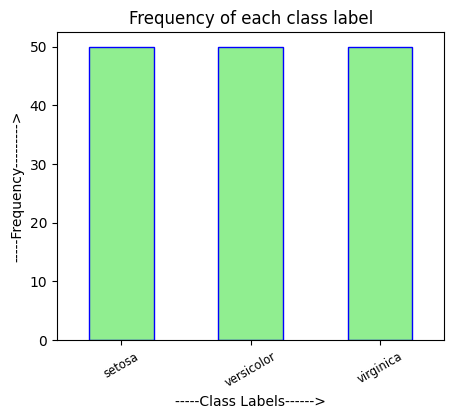

In [3]:
'''
(A)
''' 

fig = plt.figure(figsize=(5,4))
freq = df['Class Label'].value_counts()
display(freq)
f = freq.plot.bar(color = 'lightgreen',edgecolor = 'blue')
f.set_xlabel('-----Class Labels------>')
f.set_ylabel('-----Frequency--------->')
f.set_xticklabels(labels = freq.index,rotation = 30,fontsize='small')
plt.title('Frequency of each class label')

Text(0, 0.5, 'petal width (cm)')

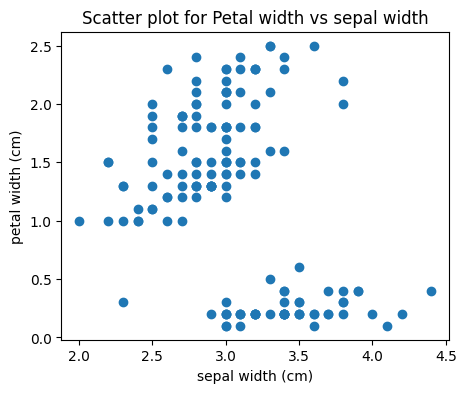

In [71]:
''' 
(B)
'''
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1,1,1)

ax.scatter(df.iloc[:,1],df.iloc[:,3])
plt.title('Scatter plot for Petal width vs sepal width')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[3])


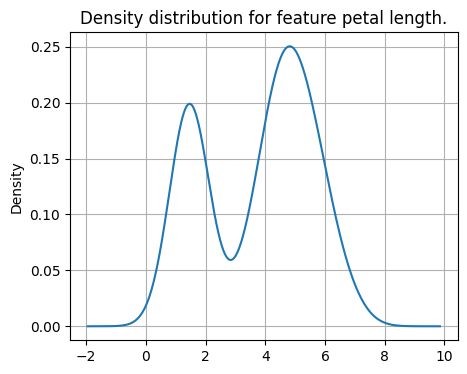

In [229]:
''' 
(C)
''' 
fig = plt.figure(figsize=(5,4))
df[df.columns[2]].plot.density()
plt.title('Density distribution for feature petal length.')
plt.grid()


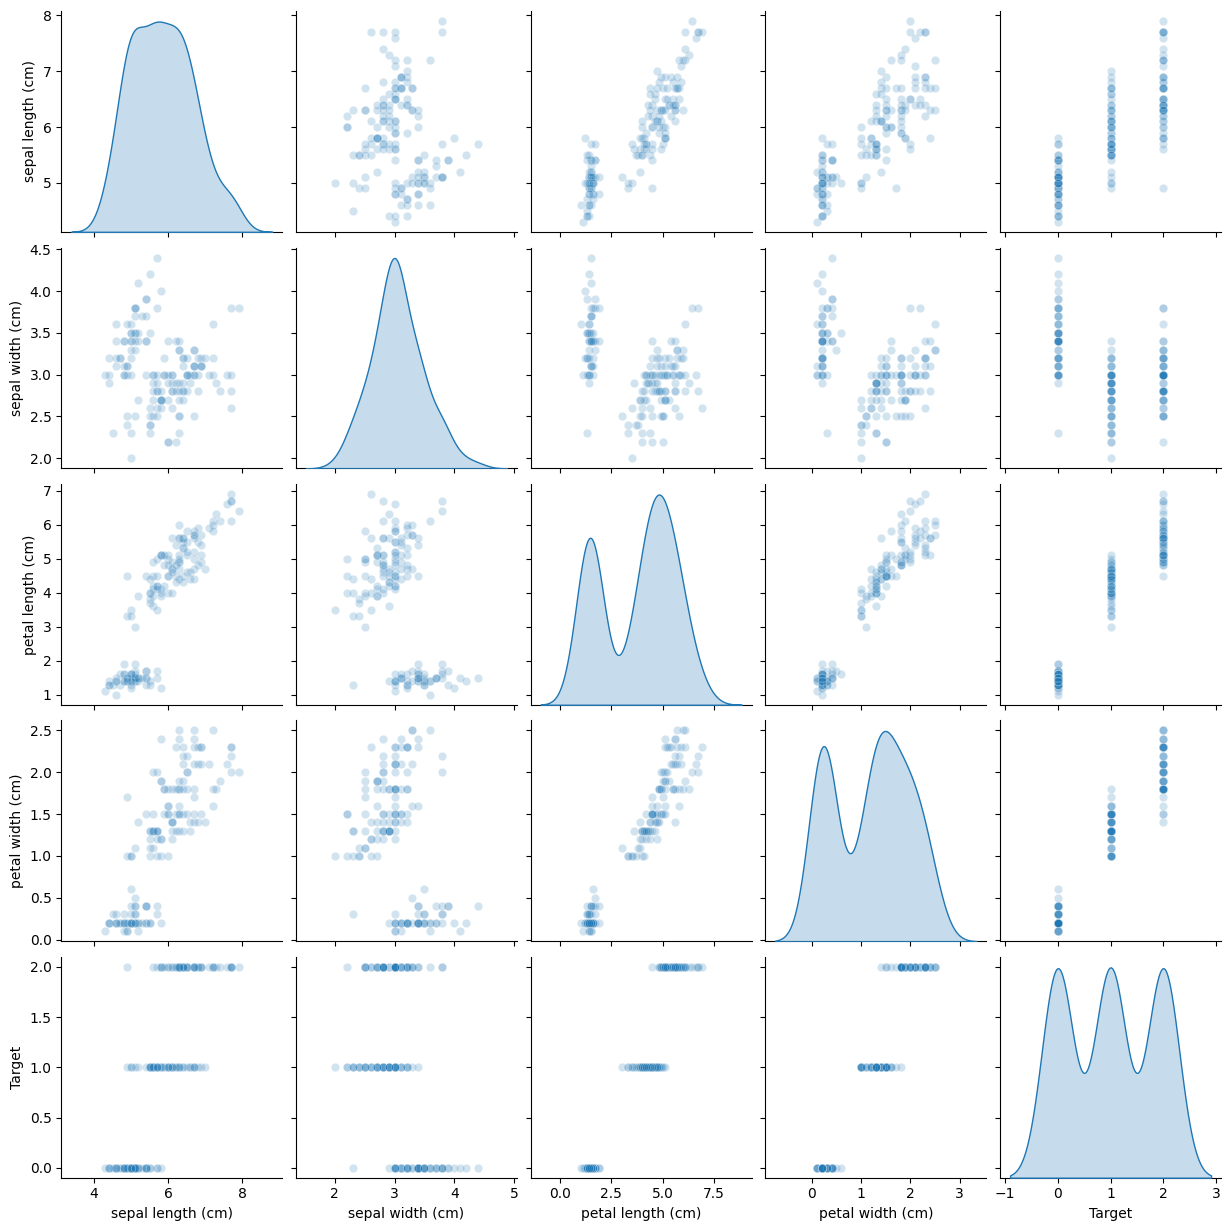

In [73]:
''' 
(D)
'''
import seaborn as sns
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.2})

Text(0.5, 0.98, 'Comparison b/w petal and sepal width')

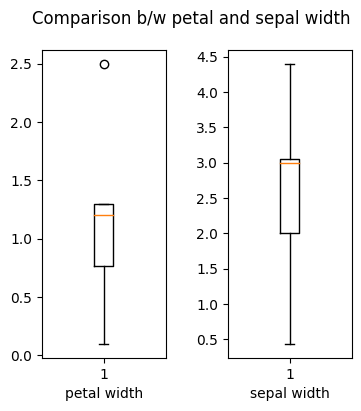

In [61]:
''' 
(E)
''' 

fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

tmp1 = pd.DataFrame([df[df.columns[3]].describe()[[1,2,3,5,7]]]).T
ax1.boxplot(tmp1)
ax1.set_xlabel('petal width')

tmp2 = pd.DataFrame([df[df.columns[1]].describe()[[1,2,3,5,7]]]).T
ax2.boxplot(tmp2)
ax2.set_xlabel('sepal width')

plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.suptitle('Comparison b/w petal and sepal width')

,sepal width (cm),petal width (cm)
mean,3.057333,1.199333
std,0.435866,0.762238
min,2.000000,0.100000
median,3.000000,1.300000
max,4.400000,2.500000


Text(0.5, 1.0, 'Five point stastical summary comparison of sepal and petal width')

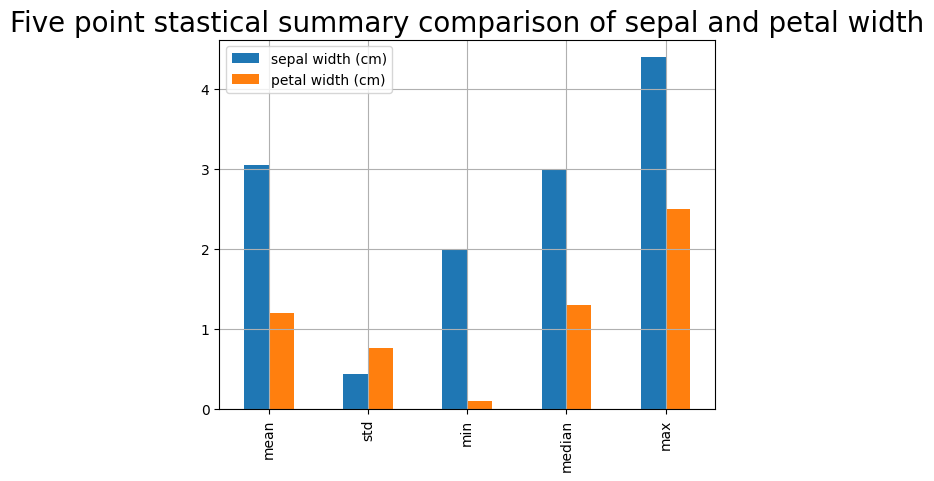

In [236]:
''' 
(F)
''' 

series_1  = df[df.columns[1]].describe()[[1,2,3,5,7]]
series_2  = df[df.columns[3]].describe()[[1,2,3,5,7]]

tmp_df = pd.DataFrame([series_1,series_2])
tmp_df.columns = ['mean','std','min','median','max']
tmp_df = tmp_df.T
display(tmp_df)

tmp_df.plot.bar()
plt.grid()
plt.title('Five point stastical summary comparison of sepal and petal width',fontsize =20)

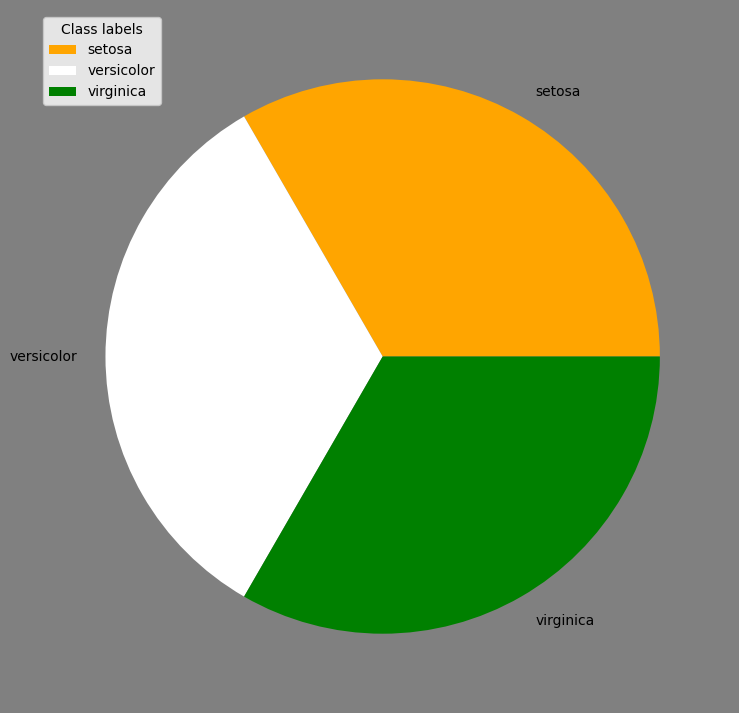

In [5]:
''' 
(G)
'''

fig = plt.figure(figsize=(9,9),facecolor='gray')
ax = fig.add_subplot(1,1,1)
value = df['Class Label'].value_counts()

ax.pie(value,labels= value.index,colors=['orange','white','green'])
ax.legend(title='Class labels')

# Q3

In [162]:
 marks_df = pd.DataFrame(np.random.randint(0,100,50).reshape(10,5),columns=['S1','S2','S3','S4','S5'])
 marks_df

,S1,S2,S3,S4,S5
0,66,7,77,98,32
1,95,41,25,92,86
2,9,20,70,72,60
3,38,13,93,72,55
4,89,21,31,86,56
5,63,32,23,50,28
6,14,93,17,1,64
7,77,62,48,91,18
8,10,51,44,75,27
9,24,95,62,87,53


In [166]:
''' 
(A)
'''

marks_df['AVG MARKS'] = marks_df.loc[:,'S1':'S5'].mean(axis=1)

bins = [0,40,60,80,90,100]
labels = ['D','C','B','A','A+']

marks_df['Grade'] = pd.cut(marks_df['AVG MARKS'],bins,labels = labels)
display(marks_df)

# computing frequency of eah grade
print('\nFrequency of each grade :: ')
marks_df['Grade'].groupby(marks_df['Grade']).count()

,S1,S2,S3,S4,S5,AVG MARKS,Grade
0,66,7,77,98,32,56.0,C
1,95,41,25,92,86,67.8,B
2,9,20,70,72,60,46.2,C
3,38,13,93,72,55,54.2,C
4,89,21,31,86,56,56.6,C
5,63,32,23,50,28,39.2,D
6,14,93,17,1,64,37.8,D
7,77,62,48,91,18,59.2,C
8,10,51,44,75,27,41.4,C
9,24,95,62,87,53,64.2,B



Frequency of each grade :: 


Grade
D     2
C     6
B     2
A     0
A+    0
Name: Grade, dtype: int64

In [153]:
'''
(vi)
'''
def grade(i):
    if i>90:
        return 'A+'  
    elif i>80:
        return 'A'
    elif i>80:
        return 'B'
    elif i>60:
        return 'C'
    elif i>40:
        return 'D'
    else:
        return 'E'

func = lambda x : grade(x)

marks_df.drop(['AVG MARKS','Grade'],axis=1,inplace = True)
# assign grade for each subject
marks_df.loc[:,'S1':'S5'] = marks_df.loc[:,'S1':'S5'].applymap(func)

marks_df.insert(0,'Roll No.',['AC-1','AC-2','AC-3','AC-4','AC-5','AC-6','AC-7','AC-8','AC-9','AC-10'])
marks_df.set_index('Roll No.',inplace=True)

marks_df.columns.name = 'Subjects'

display(marks_df)
for r in marks_df.index:
    print('\nFreq of grades obtained by student : ',r,end='')
    display(tmp[r].value_counts())

Subjects,S1,S2,S3,S4,S5
Roll No.,,,,,
AC-1,D,A+,D,E,C
AC-2,D,E,C,E,C
AC-3,D,D,E,E,A+
AC-4,C,A+,A,E,C
AC-5,E,E,A+,D,E
AC-6,D,A+,A,C,E
AC-7,A+,A,C,E,D
AC-8,C,E,E,A,E
AC-9,E,E,E,C,C



Freq of grades obtained by student :  AC-1

D     2
A+    1
E     1
C     1
dtype: int64


Freq of grades obtained by student :  AC-2

E    2
C    2
D    1
dtype: int64


Freq of grades obtained by student :  AC-3

D     2
E     2
A+    1
dtype: int64


Freq of grades obtained by student :  AC-4

C     2
A+    1
A     1
E     1
dtype: int64


Freq of grades obtained by student :  AC-5

E     3
A+    1
D     1
dtype: int64


Freq of grades obtained by student :  AC-6

D     1
A+    1
A     1
C     1
E     1
dtype: int64


Freq of grades obtained by student :  AC-7

A+    1
A     1
C     1
E     1
D     1
dtype: int64


Freq of grades obtained by student :  AC-8

E    3
C    1
A    1
dtype: int64


Freq of grades obtained by student :  AC-9

E    3
C    2
dtype: int64


Freq of grades obtained by student :  AC-10

E    3
C    1
A    1
dtype: int64